In [35]:
from keras import optimizers
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 
import os
import cv2
import random
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.models import Sequential
from keras import Model
from keras.callbacks import *


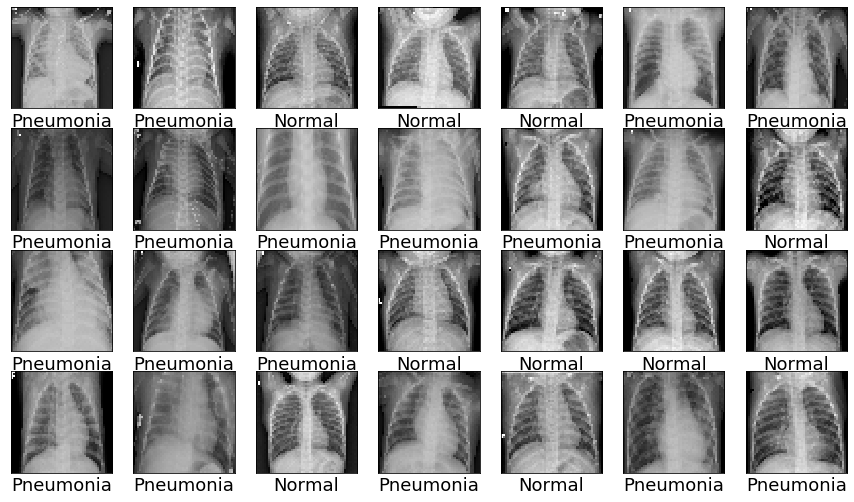

In [3]:
#import training dataset and visualise some of hem 
data  = os.path.join("c:", os.sep, "Users", "Pavlos", "Desktop","Leeds","University of Leeds","Year 3","Deep Learning for Medical Image Classification","train")
cat = ["Normal","Pneumonia"]
img_size = 50
train_data = []
for category in cat:
    path = os.path.join(data,category) #path to chest or abd
    class_num = cat.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(img_size,img_size))
        train_data.append([new_array,class_num])    
random.shuffle(train_data)
x = [] #train data
y = [] #train labels
for features, label in train_data:
    x.append(features)
    y.append(label)
x = np.array(x)
y = np.array(y)
x = x/ 255
fig = plt.figure(figsize=(15,22))
for i in range(28):
    plt.subplot(10,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False    )
    plt.imshow(x[i], cmap=plt.cm.binary)
    plt.xlabel(cat[y[i]],size=18)
plt.show()


In [4]:
#import validation dataset and testing dataset
v_data  = os.path.join("c:", os.sep, "Users", "Pavlos", "Desktop","Leeds","University of Leeds","Year 3","Deep Learning for Medical Image Classification","val")
cat_v = ["Normal","Pneumonia"]
img_size = 50
val_data = []

for category in cat_v:
    path = os.path.join(v_data,category) #path to chest or abd
    class_num = cat_v.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(img_size,img_size))
        val_data.append([new_array,class_num])     
random.shuffle(val_data)
x_val = []
y_val = []
for features, label in val_data:
    x_val.append(features)
    y_val.append(label)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_val = x_val/255

t_data  = os.path.join("c:", os.sep, "Users", "Pavlos", "Desktop","Leeds","University of Leeds","Year 3","Deep Learning for Medical Image Classification","val")
cat_test = ["Normal","Pneumonia"]
img_size = 50
test_data = []

for category in cat_test:
    path = os.path.join(t_data,category) #path to chest or abd
    class_num = cat_test.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(img_size,img_size))
        test_data.append([new_array,class_num])     
random.shuffle(test_data)
x_test = []
y_test = []
for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test/255

In [39]:
#create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
activation_37 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 9, 9, 64)         

In [21]:
#train the model using SGD as optimizer
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.99, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=model.fit(x, y,batch_size=64,epochs=50,validation_data=(x_val, y_val))


Train on 2430 samples, validate on 624 samples
Epoch 1/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6897 - accuracy: 0.5519 - val_loss: 0.6788 - val_accuracy: 0.5833
Epoch 2/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6867 - accuracy: 0.5519 - val_loss: 0.6817 - val_accuracy: 0.5833
Epoch 3/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6871 - accuracy: 0.5519 - val_loss: 0.6835 - val_accuracy: 0.5833
Epoch 4/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6854 - accuracy: 0.5519 - val_loss: 0.6790 - val_accuracy: 0.5833
Epoch 5/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6844 - accuracy: 0.5519 - val_loss: 0.6756 - val_accuracy: 0.5833
Epoch 6/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6826 - accuracy: 0.5519 - val_loss: 0.6747 - val_accuracy: 0.5833
Epoch 7/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6808 - accu

In [22]:
train_loss, train_acc = model.evaluate(x,  y, verbose=2)
print('\nTrain accuracy:', train_acc, '\nTrain loss:', train_loss)
val_loss, val_acc = model.evaluate(x_val,  y_val, verbose=2)
print('\nValidation accuracy:', val_acc, '\nValidation loss:',val_loss)


Train accuracy: 0.9798353910446167 
Train loss: 0.061694198294922155

Validation accuracy: 0.9743589758872986 
Validation loss: 0.0807765589024012


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
history1=model.fit(x, y,batch_size=64,epochs=30,validation_data=(x_val, y_val))


Train on 2430 samples, validate on 624 samples
Epoch 1/30
2430/2430 [==============================] - 6s 3ms/step - loss: 0.6673 - accuracy: 0.5975 - val_loss: 0.5964 - val_accuracy: 0.8397
Epoch 2/30
2430/2430 [==============================] - 6s 3ms/step - loss: 0.5416 - accuracy: 0.8177 - val_loss: 0.4963 - val_accuracy: 0.8189
Epoch 3/30
2430/2430 [==============================] - 6s 3ms/step - loss: 0.4862 - accuracy: 0.8547 - val_loss: 0.4725 - val_accuracy: 0.8542
Epoch 4/30
2430/2430 [==============================] - 6s 3ms/step - loss: 0.4522 - accuracy: 0.8807 - val_loss: 0.4244 - val_accuracy: 0.9135
Epoch 5/30
2430/2430 [==============================] - 6s 3ms/step - loss: 0.4115 - accuracy: 0.9004 - val_loss: 0.3741 - val_accuracy: 0.9247
Epoch 6/30
2430/2430 [==============================] - 6s 3ms/step - loss: 0.3723 - accuracy: 0.9202 - val_loss: 0.3648 - val_accuracy: 0.9119
Epoch 7/30
2430/2430 [==============================] - 6s 3ms/step - loss: 0.3450 - accu

In [12]:
ada=keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
history2=model.fit(x, y,batch_size=32,epochs=50,validation_data=(x_val, y_val))
#

Train on 2430 samples, validate on 624 samples
Epoch 1/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.7043 - accuracy: 0.4481 - val_loss: 0.6953 - val_accuracy: 0.4167
Epoch 2/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6918 - accuracy: 0.5358 - val_loss: 0.6873 - val_accuracy: 0.5833
Epoch 3/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6889 - accuracy: 0.5519 - val_loss: 0.6842 - val_accuracy: 0.5833
Epoch 4/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6879 - accuracy: 0.5519 - val_loss: 0.6826 - val_accuracy: 0.5833
Epoch 5/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6872 - accuracy: 0.5519 - val_loss: 0.6818 - val_accuracy: 0.5833
Epoch 6/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6870 - accuracy: 0.5519 - val_loss: 0.6811 - val_accuracy: 0.5833
Epoch 7/50
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6865 - accu

In [14]:
adade=keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adade, metrics=['accuracy'])
history3=model.fit(x, y,batch_size=32,epochs=20,validation_data=(x_val, y_val))



Train on 2430 samples, validate on 624 samples
Epoch 1/20
2430/2430 [==============================] - 6s 3ms/step - loss: 0.6703 - accuracy: 0.5679 - val_loss: 0.6031 - val_accuracy: 0.5833
Epoch 2/20
2430/2430 [==============================] - 6s 3ms/step - loss: 0.5338 - accuracy: 0.7889 - val_loss: 0.4444 - val_accuracy: 0.8782
Epoch 3/20
2430/2430 [==============================] - 6s 3ms/step - loss: 0.3841 - accuracy: 0.9053 - val_loss: 0.3144 - val_accuracy: 0.9199
Epoch 4/20
2430/2430 [==============================] - 6s 3ms/step - loss: 0.3162 - accuracy: 0.9173 - val_loss: 0.2640 - val_accuracy: 0.9343
Epoch 5/20
2430/2430 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9276 - val_loss: 0.2885 - val_accuracy: 0.9054
Epoch 6/20
2430/2430 [==============================] - 6s 3ms/step - loss: 0.2279 - accuracy: 0.9444 - val_loss: 0.2099 - val_accuracy: 0.9391
Epoch 7/20
2430/2430 [==============================] - 6s 3ms/step - loss: 0.2032 - accu

In [16]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

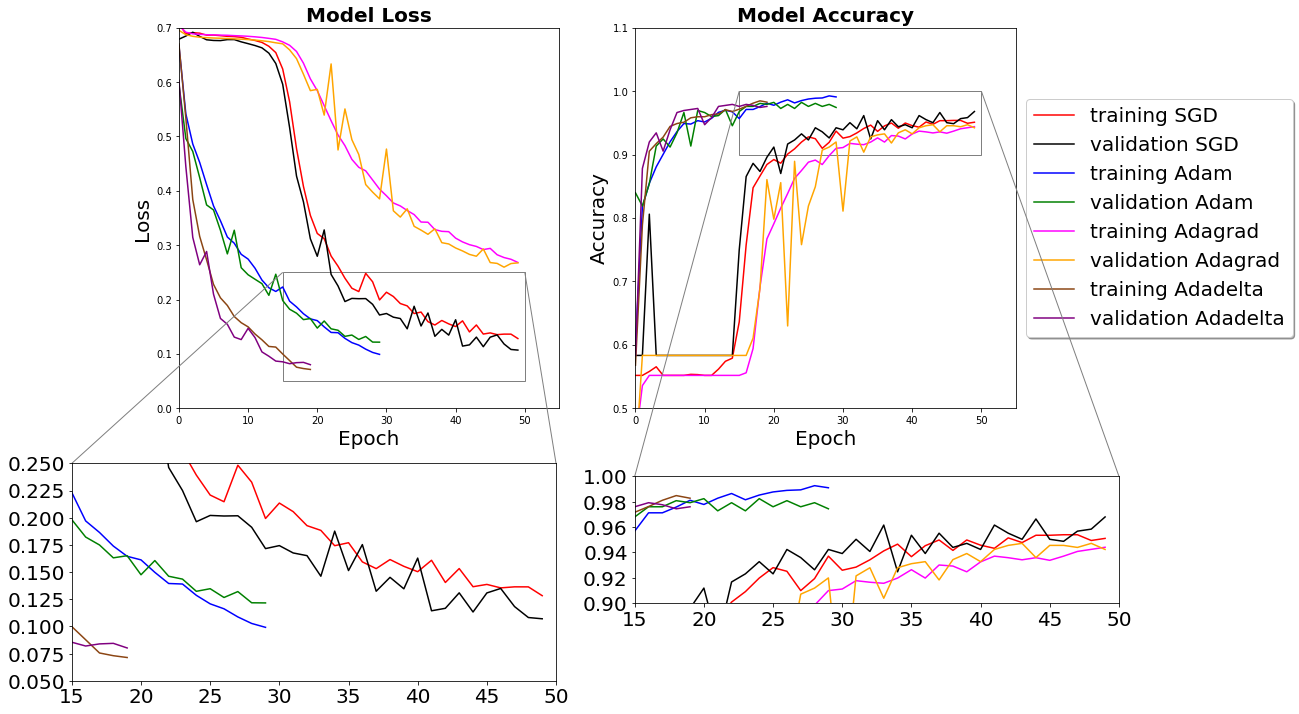

In [17]:
#plot a graph to compare the accuracies and losses
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
ax1.set_xlabel('Epoch',size=20)
ax1.set_ylabel('Loss',size=20)
ax1.set_title('Model Loss',fontweight="bold", size=20)
ax1.set_ylim([0, 0.7])
ax1.set_xlim([0, 55])
ax1.plot(history.history['loss'],color='red')
ax1.plot(history.history['val_loss'],color='black')
ax1.plot(history1.history['loss'],color='blue')
ax1.plot(history1.history['val_loss'],color='green')
ax1.plot(history2.history['loss'],color='magenta')
ax1.plot(history2.history['val_loss'],color='orange')
ax1.plot(history3.history['loss'],color='saddlebrown')
ax1.plot(history3.history['val_loss'],color='purple')
axins1 = zoomed_inset_axes(ax1, 2,loc = 10, bbox_to_anchor=(0.2,-0.3,0.1,0.2), bbox_transform=fig.transFigure)# zoom = 6
axins1.plot(history.history['loss'],color='red')
axins1.plot(history.history['val_loss'],color='black')
axins1.plot(history1.history['loss'],color='blue')
axins1.plot(history1.history['val_loss'],color='green')
axins1.plot(history2.history['loss'],color='magenta')
axins1.plot(history2.history['val_loss'],color='orange')
axins1.plot(history3.history['loss'],color='saddlebrown')
axins1.plot(history3.history['val_loss'],color='purple')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axins1.set_xlim(15, 50) # Limit the region for zoom
axins1.set_ylim(0.05, 0.25)
mark_inset(ax1, axins1, loc1=1, loc2=2, fc="none", ec="0.5")
ax2.set_xlabel('Epoch',size=20)
ax2.set_ylabel('Accuracy',size=20)
ax2.set_title('Model Accuracy',fontweight="bold", size=20)
ax2.set_ylim([0.5, 1.1])
ax2.set_xlim([0, 55])
ax2.plot(history.history['accuracy'],color='red')
ax2.plot(history.history['val_accuracy'],color='black')
ax2.plot(history1.history['accuracy'],color='blue')
ax2.plot(history1.history['val_accuracy'],color='green')
ax2.plot(history2.history['accuracy'],color='magenta')
ax2.plot(history2.history['val_accuracy'],color='orange')
ax2.plot(history3.history['accuracy'],color='saddlebrown')
ax2.plot(history3.history['val_accuracy'],color='purple')
ax2.legend(['training SGD', 'validation SGD','training Adam', 'validation Adam','training Adagrad'
,'validation Adagrad','training Adadelta', 'validation Adadelta']
,loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=True, ncol=1,prop={'size': 20})
axins2 = zoomed_inset_axes(ax2, 2,bbox_to_anchor=(0.9,-0.2,0.1,0.2), bbox_transform=fig.transFigure)
axins2.plot(history.history['accuracy'],color='red')
axins2.plot(history.history['val_accuracy'],color='black')
axins2.plot(history1.history['accuracy'],color='blue')
axins2.plot(history1.history['val_accuracy'],color='green')
axins2.plot(history2.history['accuracy'],color='magenta')
axins2.plot(history2.history['val_accuracy'],color='orange')
axins2.plot(history3.history['accuracy'],color='saddlebrown')
axins2.plot(history3.history['val_accuracy'],color='purple')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axins2.set_xlim(15, 50) # Limit the region for zoom
axins2.set_ylim(0.9, 1.0)
mark_inset(ax2, axins2, loc1=1, loc2=2, fc="none", ec="0.5")
plt.savefig('lossacc.png',bbox_inches='tight')
plt.show()


In [19]:
#we are going to use SGD to predict on our validation test
predictions = model.predict(x_val)

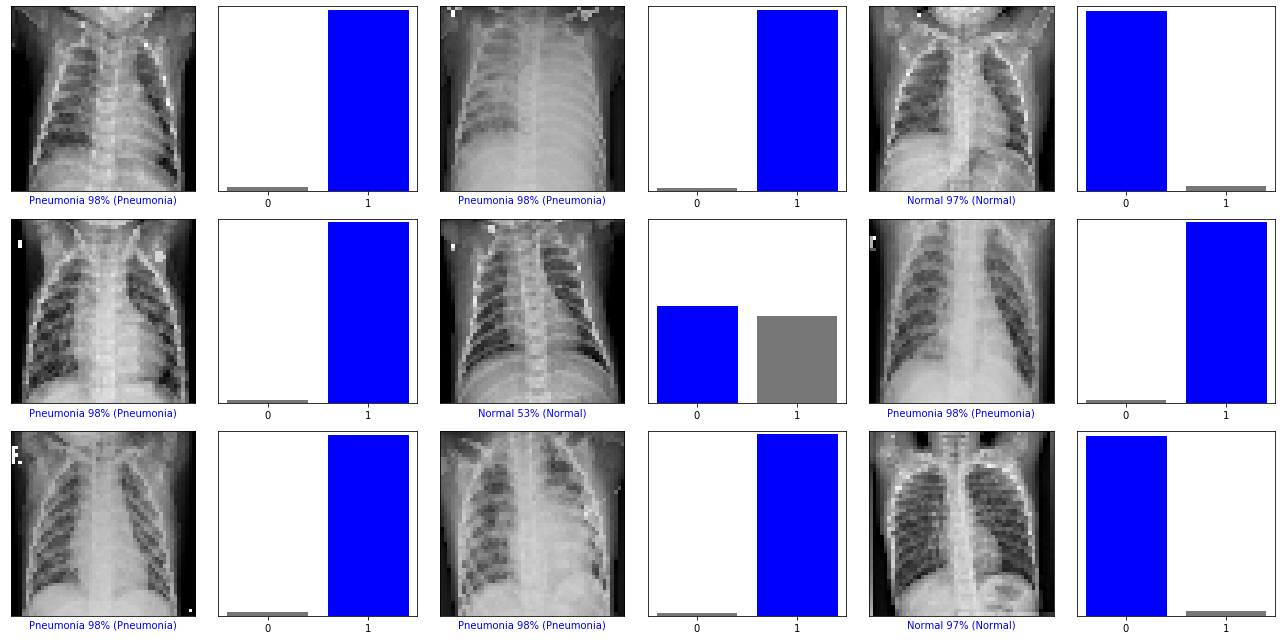

In [24]:
#create a function that visualises the data and plots the accuracy of the model for each datapoint 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(cat_v[predicted_label],
                                100*np.max(predictions_array),
                                cat_v[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 3*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_val, x_val)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_val)
plt.tight_layout()
plt.savefig('valpred.png')
plt.show()


In [25]:
#we can now evaluate the model on our testnig data and check the accuracy and loss
test_predictions = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss)


Test accuracy: 0.9743589758872986 
Test loss: 0.08077655926060218


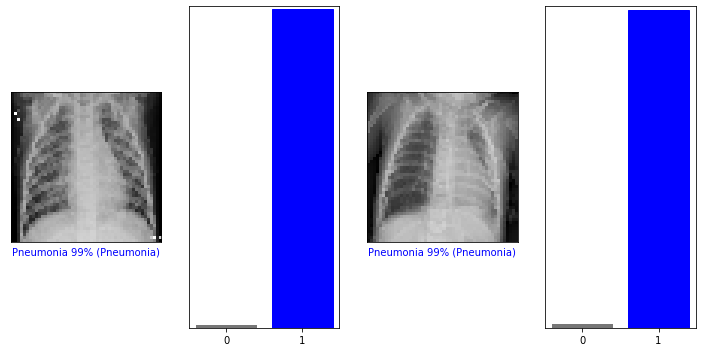

In [26]:
plt.figure(figsize=(10,5))
for i in range(2):
    plt.subplot(1, 4, 2*i+1)
    plot_image(i, test_predictions[i], y_test, x_test)
    plt.subplot(1, 4, 2*i+2)
    plot_value_array(i, test_predictions[i], y_test)
plt.tight_layout()
plt.savefig('testpred.png')
plt.show()
print()


In [33]:
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input

In [27]:
#Visualisation of Convolution Layers and Filters
#check which layers are doing the convolution process
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)


conv2d_16 (3, 3, 3, 32)
conv2d_17 (3, 3, 32, 32)
conv2d_18 (3, 3, 32, 64)


In [28]:
#normalise the data
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

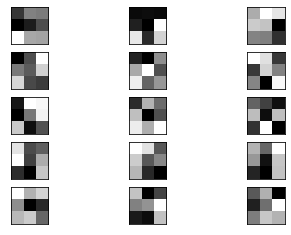

In [29]:
#Visualise the first 6 filters with their 3 channels 
n_filters = 5
ix = 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j],cmap='gray')
        ix = ix + 1
plt.savefig('filters.png')
plt.show()


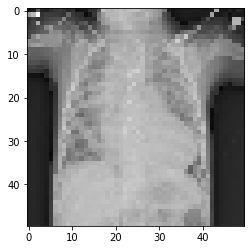

In [31]:
img = x[0]
plt.imshow(img,cmap=plt.cm.binary)


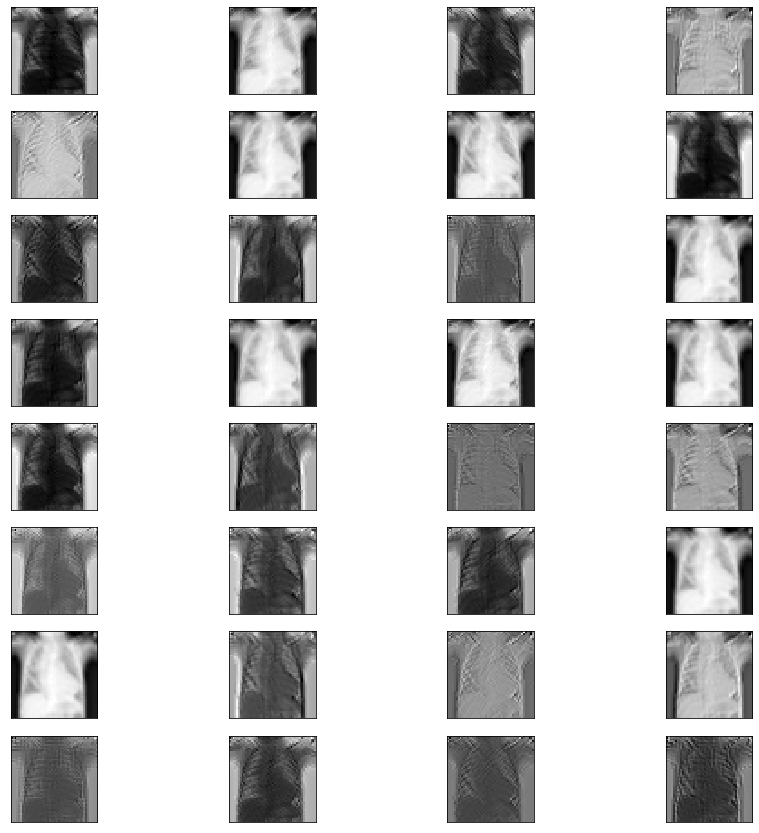

In [34]:
#Visualise the first image of our training data after the first convolution 
img = expand_dims(img, axis=0)
img = preprocess_input(img)
convmodel = Model(inputs=model.inputs, outputs=model.layers[0].output)
feature_maps = convmodel.predict(img)

plt.figure(figsize=(15,15))
ix = 1
for _ in range(4):
    for _ in range(8):
        ax = plt.subplot(8, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.show()

In [37]:
#code from https://github.com/bckenstler/CLR
class CyclicLR(Callback):

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())


In [40]:
min_lr=1e-7
max_lr=1e-2
step_size = 240
opt = optimizers.SGD(lr=min_lr, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
clr = CyclicLR(
	mode='triangular',
	base_lr=min_lr,
	max_lr=max_lr,
	step_size=step_size)
clr_model = model.fit(x,y, epochs=30,validation_data=(x_val, y_val)
,callbacks=[clr])


Train on 2430 samples, validate on 624 samples
Epoch 1/30
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6979 - accuracy: 0.4654 - val_loss: 0.6887 - val_accuracy: 0.5833
Epoch 2/30
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6884 - accuracy: 0.5519 - val_loss: 0.6805 - val_accuracy: 0.5833
Epoch 3/30
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6877 - accuracy: 0.5519 - val_loss: 0.6802 - val_accuracy: 0.5833
Epoch 4/30
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6869 - accuracy: 0.5519 - val_loss: 0.6802 - val_accuracy: 0.5833
Epoch 5/30
2430/2430 [==============================] - 6s 2ms/step - loss: 0.6854 - accuracy: 0.5519 - val_loss: 0.6788 - val_accuracy: 0.5833
Epoch 6/30
2430/2430 [==============================] - 6s 3ms/step - loss: 0.6835 - accuracy: 0.5519 - val_loss: 0.6767 - val_accuracy: 0.5833
Epoch 7/30
2430/2430 [==============================] - 7s 3ms/step - loss: 0.6834 - accu

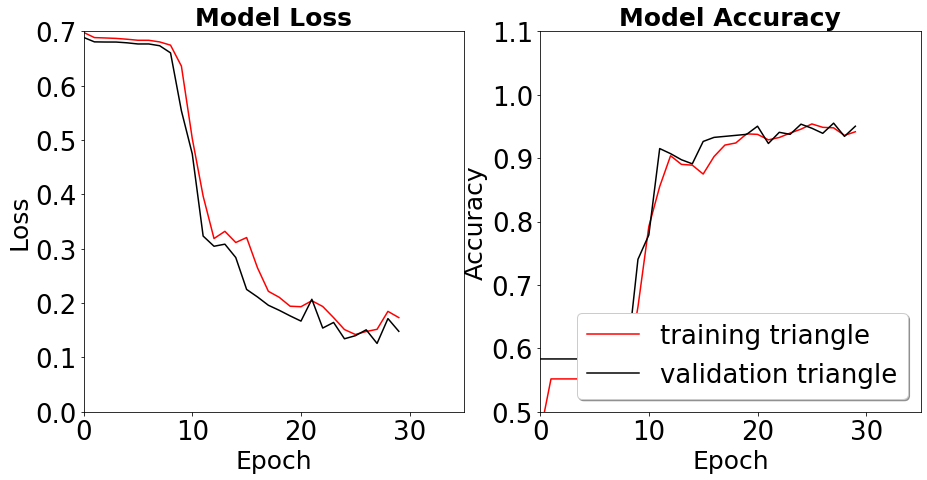

In [50]:
import matplotlib

matplotlib.rc('xtick', labelsize=26) 
matplotlib.rc('ytick', labelsize=26)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
ax1.set_xlabel('Epoch',size=25)
ax1.set_ylabel('Loss',size=25) 
ax1.set_title('Model Loss',fontweight="bold", size=25)
ax1.set_ylim([0, 0.7])
ax1.set_xlim([0, 35])
ax1.plot(clr_model.history['loss'],color='red')
ax1.plot(clr_model.history['val_loss'],color='black')
ax2.set_xlabel('Epoch',size=25)
ax2.set_ylabel('Accuracy',size=25)
ax2.set_title('Model Accuracy',fontweight="bold", size=25)
ax2.set_ylim([0.5, 1.1])
ax2.set_xlim([0, 35])
ax2.plot(clr_model.history['accuracy'],color='red')
ax2.plot(clr_model.history['val_accuracy'],color='black')
ax2.legend(['training triangle', 'validation triangle'],loc=4
,fancybox=True, shadow=True, ncol=1,prop={'size': 26})
plt.savefig('clr.png')
plt.show()